In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
from datetime import date
from scipy import stats
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

In [2]:
# Read MA PPE data
df = pd.read_csv('MA_ppe_regions.csv', parse_dates=['Time'])
df.drop(['Total Persons Tested','Percent Positivity','Deaths'], axis=1, inplace=True)
df = df.loc[df['Region']!='State Agency'].dropna(how='all')
# df

In [3]:
# df['Time']
daterange = pd.date_range(start='2020-04-29', end='2020-09-09', freq='7D')
daterange_ex = pd.date_range(start='2020-06-03', end='2020-06-17', freq='7D')
df = df[df['Time'].isin(daterange)]
df = df[~df['Time'].isin(daterange_ex)]
df.head(10)

,Time,Region,N95s/KN95s,Masks,Gowns,Gloves,Ventilators,Confirmed Cases,Hospitalized Total,Hospitalized ICU
0,2020-04-29,Central Massachusetts,138350.0,263767.0,43293.0,454250.0,79.0,5363.0,316.0,95.0
7,2020-05-06,Central Massachusetts,170144.0,292767.0,46627.0,794650.0,79.0,7056.0,295.0,94.0
14,2020-05-13,Central Massachusetts,184220.0,350367.0,54390.0,858250.0,79.0,8335.0,287.0,92.0
21,2020-05-20,Central Massachusetts,191280.0,364617.0,60380.0,889350.0,79.0,9857.0,269.0,75.0
28,2020-05-27,Central Massachusetts,220534.0,392367.0,69922.0,905950.0,83.0,10743.0,253.0,74.0
32,2020-06-24,Central Massachusetts,246509.0,465367.0,84339.0,1007650.0,83.0,12001.0,84.0,17.0
33,2020-07-01,Central Massachusetts,248049.0,472067.0,88739.0,1013850.0,83.0,12148.0,47.0,13.0
34,2020-07-08,Central Massachusetts,249229.0,474167.0,90249.0,1015450.0,83.0,12296.0,53.0,12.0
35,2020-07-15,Central Massachusetts,254659.0,493317.0,93149.0,1026050.0,83.0,12409.0,33.0,3.0
36,2020-07-22,Central Massachusetts,425969.0,687317.0,93149.0,1027050.0,83.0,12541.0,27.0,5.0


In [4]:
df['Masks/Confirmed Cases'] = df['Masks']/df['Confirmed Cases']
df['N95s/KN95s/Confirmed Cases'] = df['N95s/KN95s']/df['Confirmed Cases']
df['Gowns/Confirmed Cases'] = df['Gowns']/df['Confirmed Cases']
df['Gloves/Confirmed Cases'] = df['Gloves']/df['Confirmed Cases']
df['Ventilators/Confirmed Cases'] = df['Ventilators']/df['Confirmed Cases']

In [5]:
# df

Text(0.5, 1.0, 'N95s/KN95s Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions')

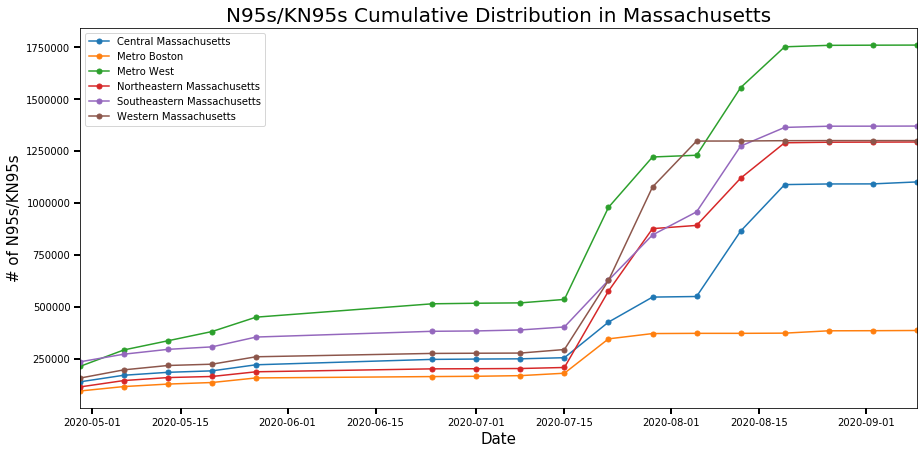

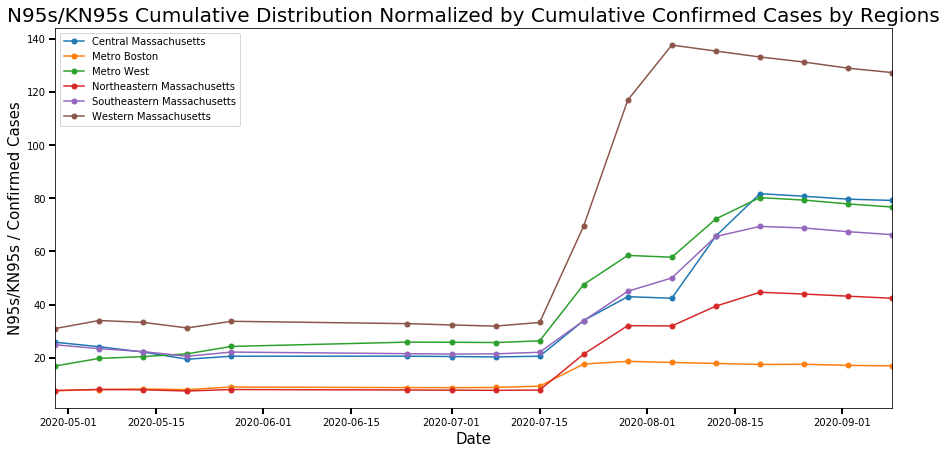

In [6]:
df_cm = df.loc[df['Region']=='Central Massachusetts']
df_mb = df.loc[df['Region']=='Metro Boston']
df_mw = df.loc[df['Region']=='Metro West']
df_nm = df.loc[df['Region']=='Northeastern Massachusetts']
df_sm = df.loc[df['Region']=='Southeastern Massachusetts']
df_wm = df.loc[df['Region']=='Western Massachusetts']
regions = ['Central Massachusetts', 'Metro Boston', 'Metro West', 'Northeastern Massachusetts', 
          'Southeastern Massachusetts', 'Western Massachusetts']
df_regions = [df_cm, df_mb, df_mw, df_nm, df_sm, df_wm]

fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'N95s/KN95s', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of N95s/KN95s', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('N95s/KN95s Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'N95s/KN95s/Confirmed Cases', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('N95s/KN95s / Confirmed Cases', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('N95s/KN95s Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions', fontsize=20)

### Rank of Conformed Cases
Northeastern Massachusetts<br>
Metro West<br>
Metro Boston<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts

Text(0.5, 1.0, 'Masks Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions')

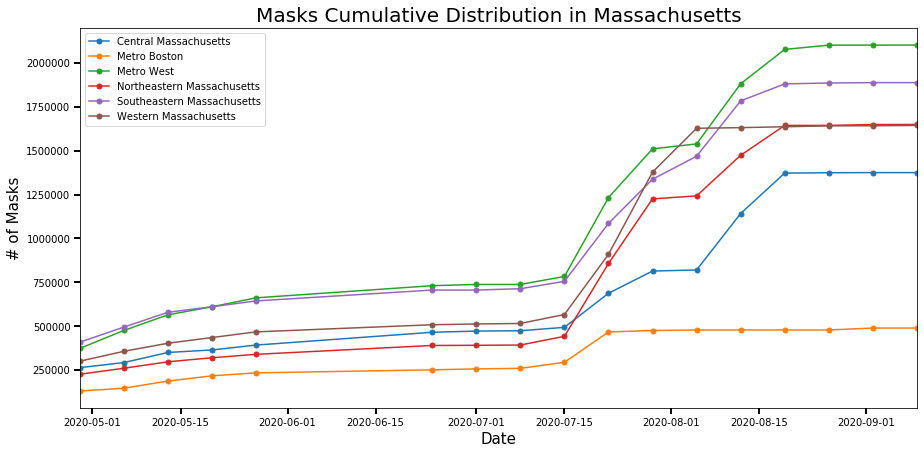

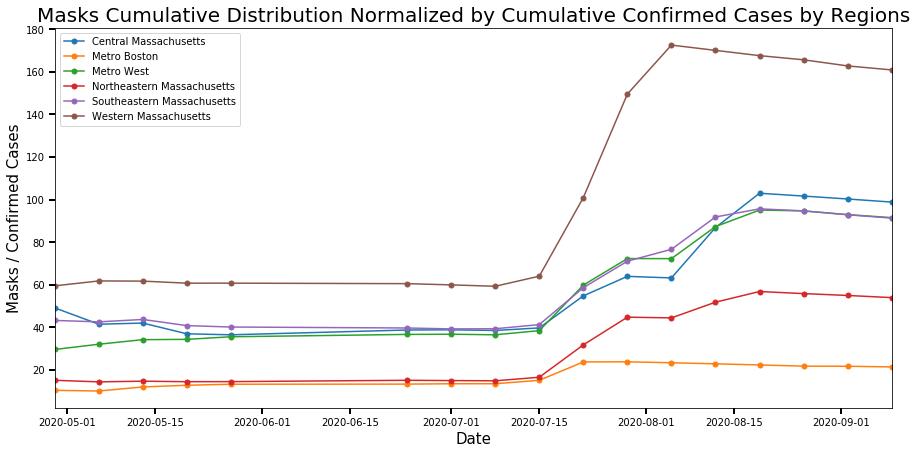

In [7]:
fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'Masks', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of Masks', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Masks Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'Masks/Confirmed Cases', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Masks / Confirmed Cases', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Masks Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions', fontsize=20)

### Rank of Conformed Cases
Northeastern Massachusetts<br>
Metro West<br>
Metro Boston<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts

Text(0.5, 1.0, 'Gowns Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions')

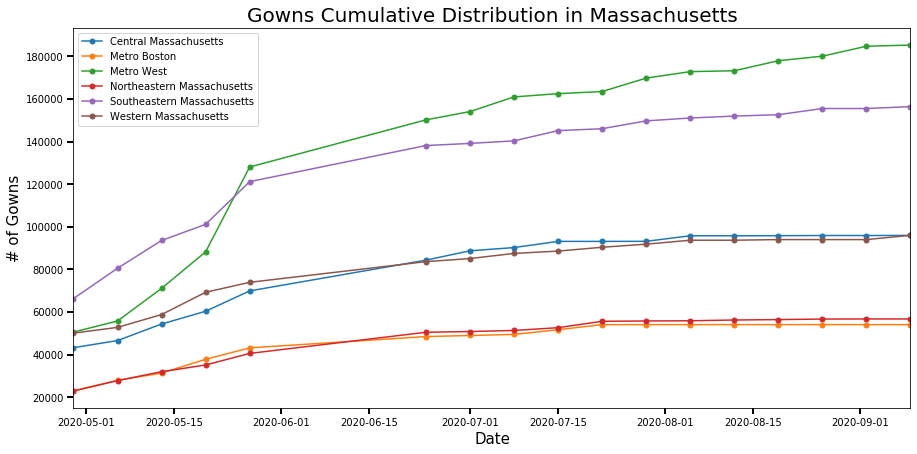

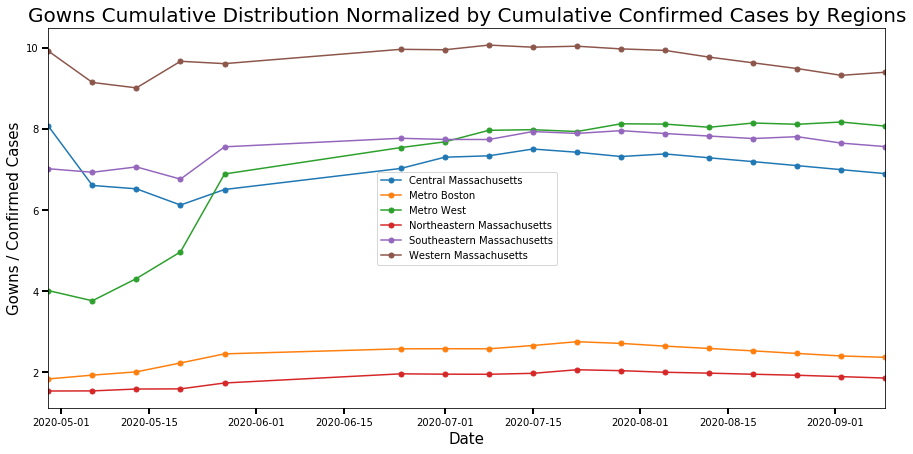

In [8]:
fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'Gowns', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of Gowns', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Gowns Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'Gowns/Confirmed Cases', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Gowns / Confirmed Cases', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Gowns Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions', fontsize=20)

### Rank of Conformed Cases
Northeastern Massachusetts<br>
Metro West<br>
Metro Boston<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts

Text(0.5, 1.0, 'Gloves Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions')

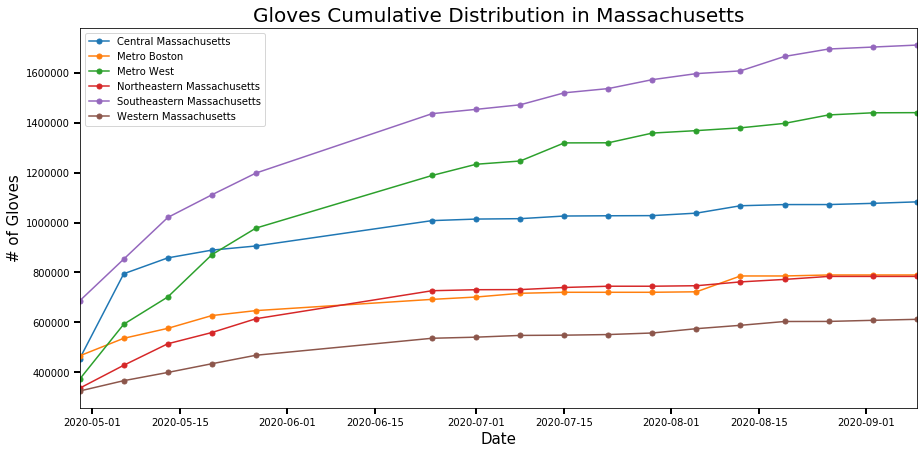

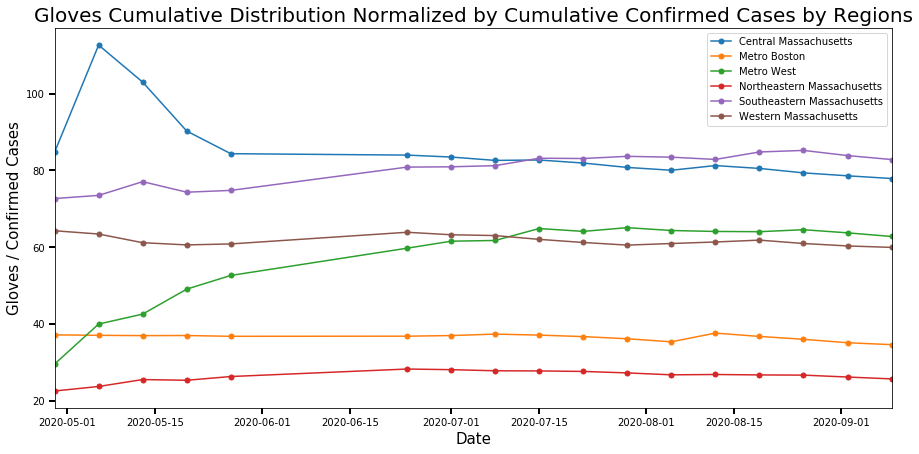

In [9]:
fig, ax1 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax1.plot('Time', 'Gloves', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('# of Gloves', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=10)
ax1.legend()
ax1.set_title('Gloves Cumulative Distribution in Massachusetts', fontsize=20)


fig, ax2 = plt.subplots(1,1,figsize=(15,7))

i = 0
for df_region in df_regions:
    ax2.plot('Time', 'Gloves/Confirmed Cases', data=df_region, marker='.', markersize=10, label=regions[i])
    i += 1
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Gloves / Confirmed Cases', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=10)
ax2.legend()
ax2.set_title('Gloves Cumulative Distribution Normalized by Cumulative Confirmed Cases by Regions', fontsize=20)

### Rank of Conformed Cases
Northeastern Massachusetts<br>
Metro West<br>
Metro Boston<br>
Southeastern Massachusetts<br>
Central Massachusetts<br>
Western Massachusetts